# Projet 3 : Préparez des données pour un organisme de santé publique

Voici les différentes étapes pour nettoyer et explorer les données :

**1) Traiter le jeu de données**.

    Repérer des variables pertinentes pour les traitements à venir, et nécessaires pour suggérer des valeurs manquantes,.
    Nettoyer les données en :
        mettant en évidence les éventuelles valeurs manquantes parmi les variables pertinentes sélectionnées, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
        identifiant et en traitant les éventuelles valeurs aberrantes de chaque variable.
    Automatiser ces traitements pour éviter de répéter ces opérations

Attention, le client souhaite que le programme fonctionne si la base de données est légèrement modifiée (ajout d’entrées, par exemple) !

**2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement**.

Et un mot à ce sujet : le client nous demande de réaliser une présentation qui permet d’expliquer les analyses faites à un public néophyte. Sois donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux ton propos.

**3) Sélectionner / créer des variables à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.**

**4) Rédiger un rapport d’exploration et une conclusion pour expliquer la faisabilité de l’application demandée.**

**5) Même si les données n’incluent pas de données personnelles, on doit expliquer dans une présentation en quoi ce projet respecte les 5 grands principes du RGPD. Santé publique France aimerait publier quelque chose sur le site Open Food Facts pour couper court aux questions sur le respect des RGPD que nous recevons parfois.** 

##  Traitement du jeu de données.

### Importation des packages

In [1]:
import pandas as pd
import numpy as np
#%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
#import sante as s
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")
from tqdm import tqdm

#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1)

### Chargement des données

In [9]:
data = pd.read_csv('openfoodfacts.org.products.csv',sep='\t', low_memory=False)

In [3]:
# Charger les données en spécifiant le séparateur et en nettoyant les espaces indésirables
df = pd.read_csv('Produits.csv')
df.head(2)

C:\Users\HSPH9696\AppData\Local\Temp\ipykernel_5748\3551841094.py:2: DtypeWarning: Columns (0,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Produits.csv')


,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,brands,categories_fr,origins,manufacturing_places,labels_fr,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_fr,ingredients_text,allergens,traces_fr,serving_size,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,4530,http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",NaN,NaN,28 g (1 ONZ),NaN,NaN,NaN,d,NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000,14.0
1,4559,http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,Torn & Glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",NaN,NaN,28 g (0.25 cup),NaN,NaN,NaN,b,NaN,NaN,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.635,0.0


### Premier nettoyage

#### Valeurs manquantes, duplications et taille du data set

In [3]:
value = s.missing_values(df)

Le total des valeurs manquantes est 4065906
Nombre de lignes dupliquées : 0
The size of the database is: (263548, 38)


#### taille avant et après nettoyage

In [6]:
taille = pd.DataFrame({'Nom' : ['données initiales', 'données nettoyées'],
                           
                            'Dimensions' : [data.shape, 
                                           df.shape],
                           
                            'Proportion de NaN (en %)' :
                            [data.isna().sum().sum()/data.shape[0]/data.shape[1]*100,
                             df.isna().sum().sum()/
                             df.shape[0] / 
                             df.shape[1]*100]
                           })

In [18]:
taille_jeux

,Nom,Dimensions,Proportion de NaN (en %)
0,données initiales,"(320772, 162)",76.221573
1,données nettoyées,"(263548, 38)",40.598876


In [4]:
df.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'quantity', 'packaging', 'brands', 'categories_fr',
       'origins', 'manufacturing_places', 'labels_fr', 'emb_codes',
       'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores',
       'countries_fr', 'ingredients_text', 'allergens', 'traces_fr',
       'serving_size', 'additives_fr', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'image_url', 'image_small_url', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

## Description des variables

code: Code identifiant unique pour le produit.
url: URL du produit sur Open Food Facts.
creator: Créateur ou contributeur du produit dans la base de données.
created_datetime: Date et heure de création de l'entrée du produit.
last_modified_datetime: Date et heure de la dernière modification de l'entrée du produit.
product_name: Nom du produit.
quantity: Quantité du produit, par exemple, le poids ou le volume.
packaging: Type d'emballage du produit.
brands: Marque du produit.
categories_fr: Catégories du produit (en français).
origins: Origine du produit.
manufacturing_places: Lieu de fabrication du produit.
labels_fr: Étiquettes du produit (en français).
emb_codes: Codes d'embouteillage ou d'identification spécifiques.
first_packaging_code_geo: Coordonnées géographiques du premier emballage.
cities_tags: Tags de villes associées au produit.
purchase_places: Lieux d'achat du produit.
stores: Magasins où le produit est disponible.
countries_fr: Pays où le produit est disponible (en français).
ingredients_text: Liste des ingrédients du produit.
allergens: Informations sur les allergènes présents dans le produit.
traces_fr: Informations sur les éventuelles traces d'allergènes (en français).
serving_size: Taille de la portion.
additives_fr: Additifs utilisés dans le produit (en français).
ingredients_from_palm_oil_tags: Étiquettes indiquant si des ingrédients proviennent de l'huile de palme.
ingredients_that_may_be_from_palm_oil_tags: Étiquettes indiquant des ingrédients pouvant provenir de l'huile de palme.
nutrition_grade_fr: Grade nutritionnel du produit (en français).
image_url: URL de l'image du produit.
image_small_url: URL de la petite image du produit.







### Valeurs nutritionnels

* energy_100g: Énergie en kilojoules (kJ) ou kilocalories (kcal) pour 100g du produit.
* fat_100g: Quantité de matières grasses en grammes pour 100g du produit.
* saturated-fat_100g: Quantité de graisses saturées en grammes pour 100g du produit.
* carbohydrates_100g: Quantité de glucides en grammes pour 100g du produit.
* sugars_100g: Quantité de sucres en grammes pour 100g du produit.
* fiber_100g: Quantité de fibres alimentaires en grammes pour 100g du produit.
* proteins_100g: Quantité de protéines en grammes pour 100g du produit.
* salt_100g: Quantité de sel en grammes pour 100g du produit.
* nutrition-score-fr_100g: Score nutritionnel calculé pour 100g du produit, basé sur une * * formule spécifique prenant en compte divers aspects nutritionnels (ce score peut varier * selon les critères de calcul spécifiques à Open Food Facts).


#### Variables catéorielles et numériques

In [23]:
#df_drop.dtypes

In [6]:
numeriques = df.select_dtypes(include=['float64'])
categorielles = df.select_dtypes(include=['object'])


In [7]:
numeriques.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [7]:
categorielles.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'quantity', 'packaging', 'brands', 'categories_fr',
       'origins', 'manufacturing_places', 'labels_fr', 'emb_codes',
       'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores',
       'countries_fr', 'ingredients_text', 'allergens', 'traces_fr',
       'serving_size', 'additives_fr', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'image_url', 'image_small_url'],
      dtype='object')

## Valeurs manquantes

In [4]:
# Calcul du nombre de valeurs manquantes pour chaque variable
missing_values = df.isnull().sum()

# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = missing_values / len(df)

# Création d'un dataframe avec les nombres et proportions de valeurs manquantes
missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Nombre de valeurs manquantes', 'Proportion de valeurs manquantes']

# Tri des variables par ordre décroissant de proportion de valeurs manquantes
missing_df = missing_df.sort_values('Proportion de valeurs manquantes', ascending=False)

# Affichage du tableau
missing_df

,Nombre de valeurs manquantes,Proportion de valeurs manquantes
ingredients_from_palm_oil_tags,258718,0.981673
ingredients_that_may_be_from_palm_oil_tags,251863,0.955663
origins,246818,0.936520
first_packaging_code_geo,246634,0.935822
cities_tags,245245,0.930552
traces_fr,240400,0.912168
emb_codes,237768,0.902181
allergens,236636,0.897886
manufacturing_places,232703,0.882962
labels_fr,224255,0.850908


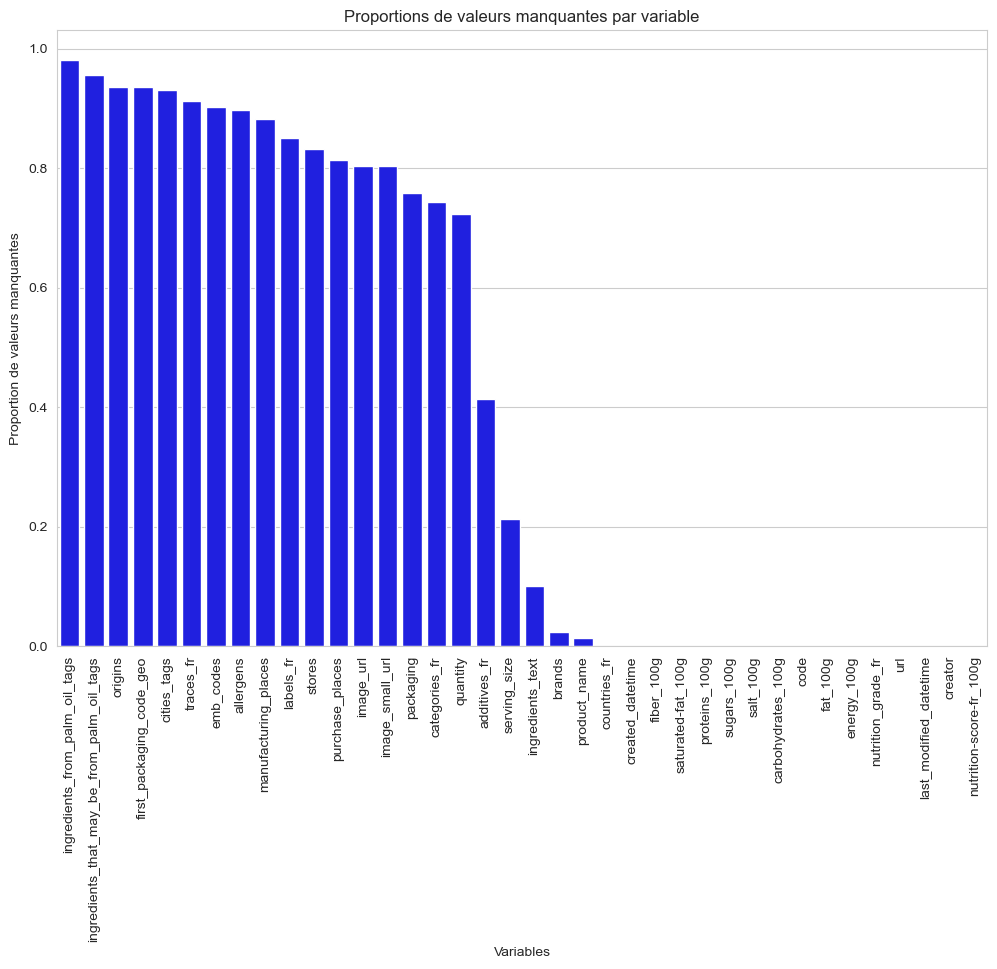

In [5]:
# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = df.isnull().mean().sort_values(ascending=False)

# Création du graphique avec Seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=missing_proportions.index, y=missing_proportions.values, ax=ax, color='blue')
ax.set_xlabel('Variables')
ax.set_ylabel('Proportion de valeurs manquantes')
ax.set_xticklabels(missing_proportions.index, rotation=90)
ax.set_title('Proportions de valeurs manquantes par variable')
plt.show()

## Question 2 : Analyse univariée

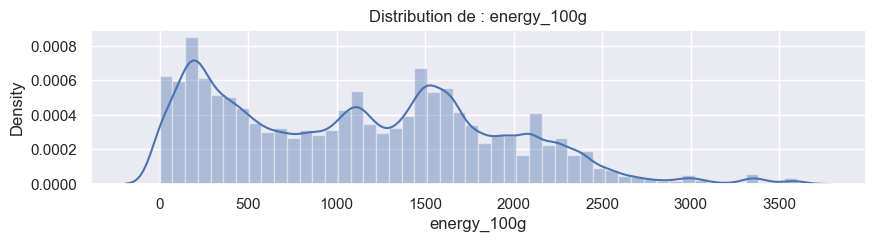

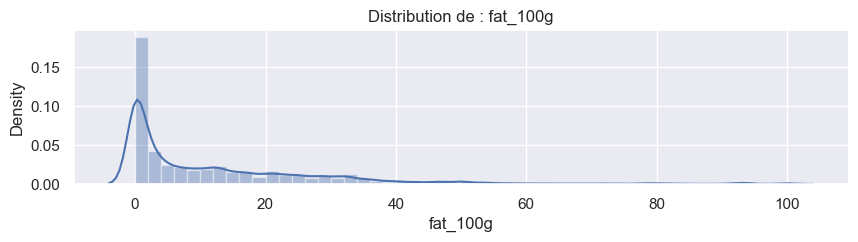

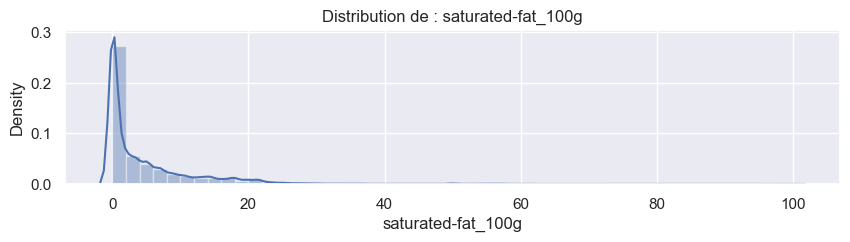

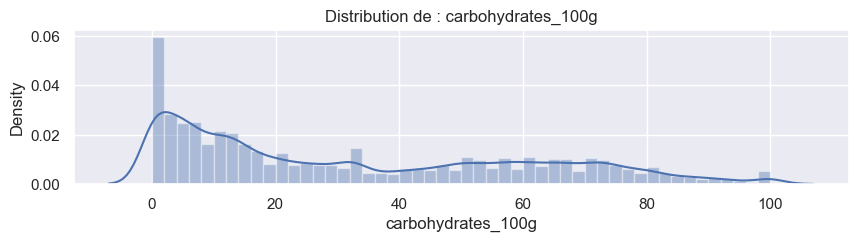

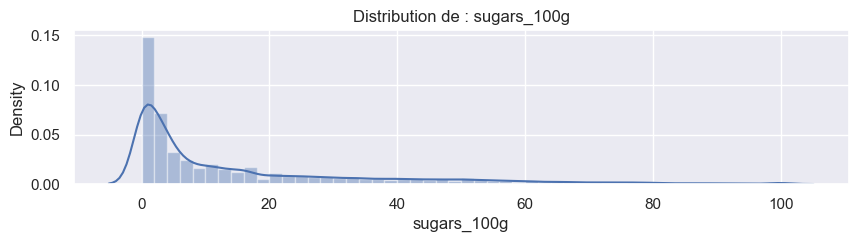

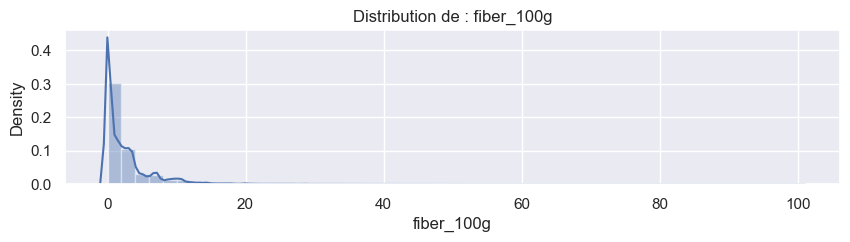

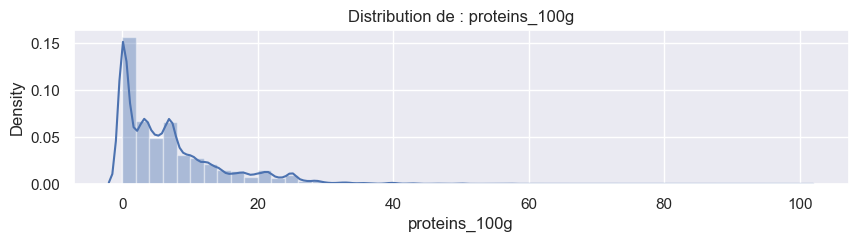

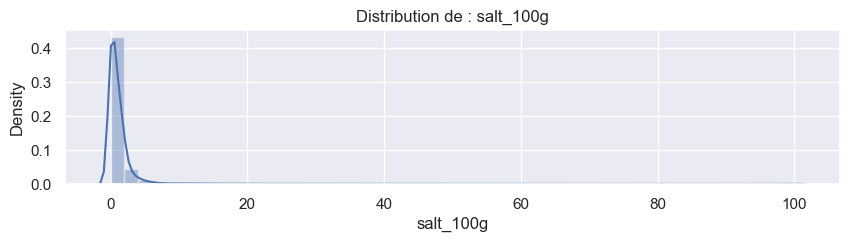

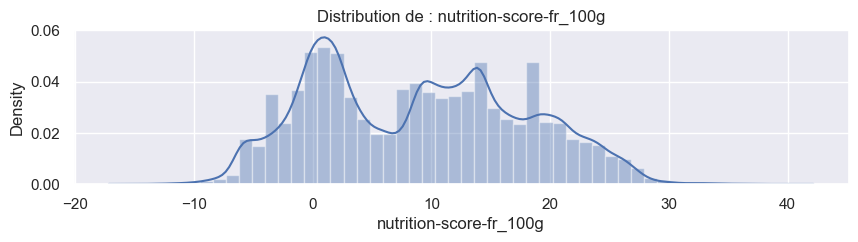

In [8]:
numeric_columns = df.select_dtypes(include = ['int32','float64']).columns
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(df[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

In [8]:
num =['energy_100g',
      'fat_100g',
      'saturated-fat_100g',
      'carbohydrates_100g',
      'sugars_100g',
       'fiber_100g',
      'proteins_100g',
      'salt_100g',
      'nutrition-score-fr_100g']
    

In [9]:
df[['energy_100g',
      'fat_100g',
      'saturated-fat_100g',
      'carbohydrates_100g',
      'sugars_100g',
       'fiber_100g',
      'proteins_100g',
      'salt_100g',
      'nutrition-score-fr_100g']
    ].describe(percentiles=[.90, .95, .99])

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,263548.000000,263548.000000,263548.000000,263548.000000,263548.000000,263548.000000,263548.000000,263548.000000,263548.000000
mean,1123.786166,12.289978,4.566003,32.181907,15.582274,2.559656,7.154285,1.595909,8.937450
std,771.362944,16.330665,7.222385,28.207205,20.707402,4.247052,8.075926,6.158141,8.759371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
50%,1123.675948,5.560000,1.330000,23.010000,5.800000,1.200000,5.000000,0.614680,9.000000
90%,2155.000000,32.140000,14.290000,73.680000,47.766000,7.100000,18.750000,2.448560,21.000000
95%,2389.000000,43.000000,19.000000,81.400000,60.710000,10.000000,23.530000,4.000000,24.000000
99%,3061.000000,80.000000,28.100000,99.253000,86.670000,18.231800,33.330000,22.014180,27.000000
max,3598.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000


In [ ]:
## Analyse des termes lesplus fréquents

**Idée d'applicaion** Développer une application mobile conviviale qui permet aux utilisateurs de scanner les codes-barres des produits alimentaires et d'obtenir instantanément des informations détaillées sur leur qualité nutritionnelle.
**interquartil rage**, iltrer les valeurs ilogiques et filter les outliers

### Analyse bivariée

#### Matrice de corrélation de peason pour les variables numériques pertiantes

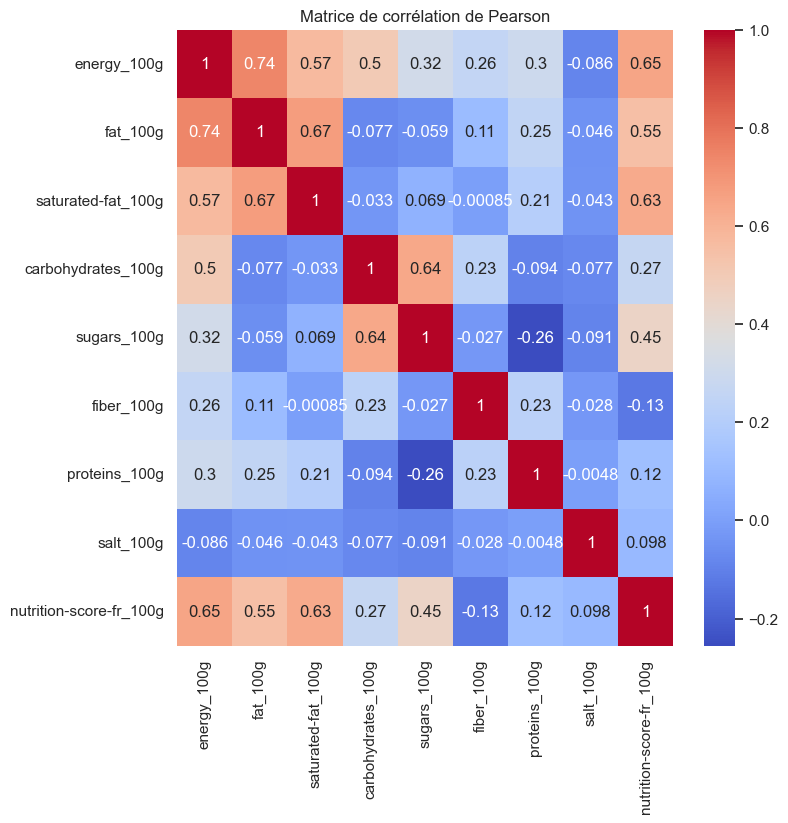

In [51]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
correlation_matrix = df[num].corr()
correlation_matrixcorrelation_matrix = df[num].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation de Pearson')
plt.show()

L’ACP, ou analyse en composante principale, permet de créer des dimensions « synthétiques » qui regroupent plusieurs dimensions en une seule.

On peut ainsi passer d'un dataframe à 30 colonnes à un dataframe à 3 colonnes, ce qui facilite grandement l'analyse.

* les méthodes factorielles ;

* les méthodes de classification non supervisée, aussi appelées de partitionnement de données (plus connues sous le terme anglais de clustering).

* Chacune de ces 2 familles possède une méthode emblématique :

l'analyse en composantes principales (ACP) ou Principal Component Analysis (PCA) en anglais, qui est la plus connue des méthodes factorielles ;

l'algorithme k-means (en français "k-moyennes"), qui est le plus connu des algorithmes de clustering.

* En quoi sont-elles intéressantes ?
Dans les 2 cas, ces familles de méthodes ont un intérêt commun : celui de simplifier les données pour faciliter ensuite leur analyse. Comment ? En trouvant des stratagèmes pour réduire les dimensions d'un tableau de données.

In [ ]:
### methode 1 acp (factorielle)
il reduit le nombre de colonne, donc on peux remplacer une colonne par une autre

In [ ]:
le clustering va regrouper les individus similaires en plusieurs groupes

### Réduction de dimension par ACP / PCA

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### choix des variables quantitatives pour ACP

In [10]:
df.select_dtypes(['float64','int32']).shape

(263548, 9)

#### srppression des lignes à valeurs manquantes

In [11]:
data_pca = df.select_dtypes(['float64','int32']).dropna()

In [12]:
colonnes_pca = data_pca.columns
colonnes_pca 

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

#### Standardisation / normalisarion(x=0,v=1)

In [29]:
scaler = StandardScaler()
data_pca = scaler.fit_transform(data_pca)

In [30]:
pca = PCA(n_components = data_pca.shape[1])

### Nonbre de composante pourl'ACP

In [31]:
pca.fit(data_pca)

PCA(n_components=9)

### Liste de valeurs ratio de la variance expliquée par chaque composante

In [32]:
pca.explained_variance_ratio_

array([0.35272391, 0.20625164, 0.14685473, 0.11186741, 0.07614414,
       0.04605578, 0.0325385 , 0.02117104, 0.00639286])

explained_variance_ratio_ retourne un tableau (ou une liste) de valeurs qui représentent le ratio de la variance expliquée par chaque composante principale par rapport à la variance totale des données.

### valeurs singulières associées aux composantes principales

In [33]:
pca.singular_values_

array([914.67869829, 699.43895882, 590.19439912, 515.11346739,
       424.98085292, 330.51655031, 277.81128956, 224.08985515,
       123.13982941])

singular_values_ renvoie un tableau (ou une liste) des valeurs singulières associées aux composantes principales obtenues à partir de l'ACP. Ces valeurs sont utilisées pour quantifier l'importance de chaque composante principale dans la représentation des données d'origine

### Somme cumulée de variance des composantes

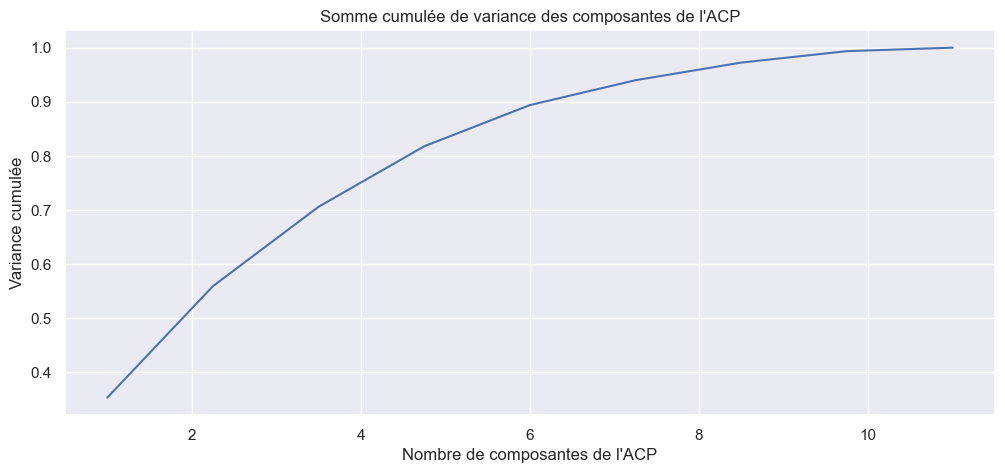

In [35]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(np.linspace(1, 11,9),
         np.cumsum(pca.explained_variance_ratio_))


**RQ** a partir de la composante 6 on est à 90% de variance cumilée  et à partir de la composante 7,on a  une variance cumulée de plus de 95 %. On pourrait donc réduire notre jeu de données à 7 dimensions si on souhaitait gagner en temps de calcul / volume de données.
95 %peut être suffisant pour représenter les données de manière significative tout en réduisant leur dimensionnalité


plus de 3 dimension c'est enorme,  avoir 3 composante principale, pour simplifier les informations pour les non data scientist

In [36]:
pca.components_

array([[ 0.51992528,  0.43814408,  0.42767622,  0.22510754,  0.22166436,
         0.09483204,  0.1630555 , -0.0361219 ,  0.4670193 ],
       [-0.0333731 ,  0.32447696,  0.24841593, -0.57135385, -0.59545968,
         0.00164438,  0.37527205,  0.07872799, -0.0619927 ],
       [ 0.16433936, -0.05449161, -0.20882145,  0.25990651, -0.11637628,
         0.73804913,  0.39867978, -0.20511936, -0.31557244],
       [ 0.00857851, -0.09049884, -0.10435593,  0.10322619, -0.00453111,
         0.17815409,  0.11696126,  0.95411104,  0.12009717],
       [ 0.0349026 ,  0.30755373,  0.14523712, -0.11126574, -0.13192167,
         0.45512231, -0.78372346,  0.08691056, -0.15621483],
       [-0.4159359 , -0.35925717,  0.48485143, -0.32338734,  0.37278601,
         0.40054592,  0.09710966, -0.05437964,  0.21558631],
       [ 0.01323273, -0.36009727,  0.62227378,  0.48455918, -0.40947801,
        -0.14487545, -0.05822247,  0.04292085, -0.23289354],
       [ 0.0908738 ,  0.23306453,  0.23916209, -0.1049771 ,  0

In [ ]:
mettre ces composante en data frame, 

In [13]:
import pandas as pd

data = {
    'pc1': [0.51992528,  0.43814408,  0.42767622,  0.22510754,  0.22166436,0.09483204,  0.1630555 , -0.0361219 ,  0.4670193 ]
,
    'pc2': [-0.0333731 ,  0.32447696,  0.24841593, -0.57135385, -0.59545968,
         0.00164438,  0.37527205,  0.07872799, -0.0619927 ],
    'pc3': [ 0.16433936, -0.05449161, -0.20882145,  0.25990651, -0.11637628,
         0.73804913,  0.39867978, -0.20511936, -0.31557244]}
    

df = pd.DataFrame(data,index =  colonnes_pca)

print(df)


                              pc1       pc2       pc3
energy_100g              0.519925 -0.033373  0.164339
fat_100g                 0.438144  0.324477 -0.054492
saturated-fat_100g       0.427676  0.248416 -0.208821
carbohydrates_100g       0.225108 -0.571354  0.259907
sugars_100g              0.221664 -0.595460 -0.116376
fiber_100g               0.094832  0.001644  0.738049
proteins_100g            0.163055  0.375272  0.398680
salt_100g               -0.036122  0.078728 -0.205119
nutrition-score-fr_100g  0.467019 -0.061993 -0.315572


In [ ]:
## heatmap

<Axes: >

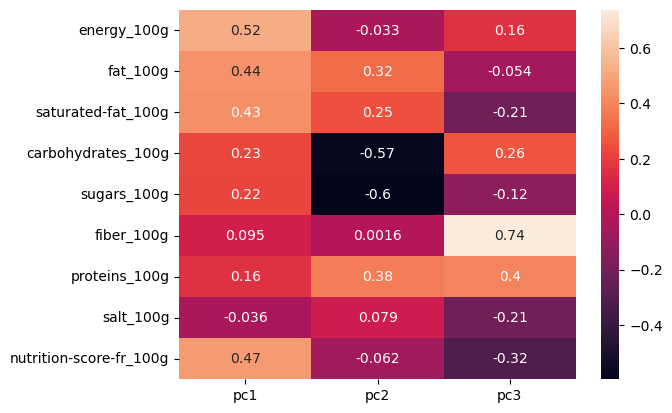

In [15]:
sns.heatmap(df, annot= True)

In [ ]:
** il ya des variables qui vont ensemple on peut travailler les les composentes principale,
pc1(energy, fat, nutriscore), pc2(fat, proteine)

Composantes principales (PC1, PC2, PC3) :

PC1, PC2 et PC3 représentent des combinaisons linéaires des variables initiales (dans ce cas, des nutriments et des scores nutritionnels) qui capturent le maximum de variation dans les données.
Chaque composante principale est une nouvelle variable qui est une combinaison pondérée des variables d'origine.
Interprétation des charges (coefficients) des variables :

Les chiffres indiqués (0.519925, -0.033373, etc.) sont appelés "charges" ou "coefficients". Ils montrent comment chaque variable initiale contribue à chaque composante principale.
Plus le coefficient d'une variable est élevé en valeur absolue pour une composante principale, plus cette variable a d'impact sur cette composante.
Analyse des contributions des variables :

En regardant les charges les plus élevées (positives ou négatives) pour chaque composante principale, on peut interpréter quelles variables ont le plus d'influence sur cette composante.
Par exemple, dans PC1, les variables avec les charges les plus élevées (positives ou négatives) semblent être "energy_100g", "fat_100g", "saturated-fat_100g", et "nutrition-score-fr_100g". Cela signifie que ces variables ont une forte influence sur la variation de PC1.
Relation entre variables et composantes :

Les variables qui ont des charges similaires pour une même composante principale sont liées entre elles dans le contexte de cette composante.
Par exemple, dans PC3, "fiber_100g", "proteins_100g", et "carbohydrates_100g" ont des charges significatives. Cela suggère qu'il y a une certaine relation entre ces nutriments dans la variation capturée par PC3.
Ces résultats de l'ACP permettent de comprendre quelles variables initiales contribuent le plus à la variation observée dans chaque composante principale, offrant ainsi des informations sur les relations entre les différentes variables nutritionnelles dans le jeu de données.







In [37]:
pca.components_.shape

(9, 9)

### Plan factiriel

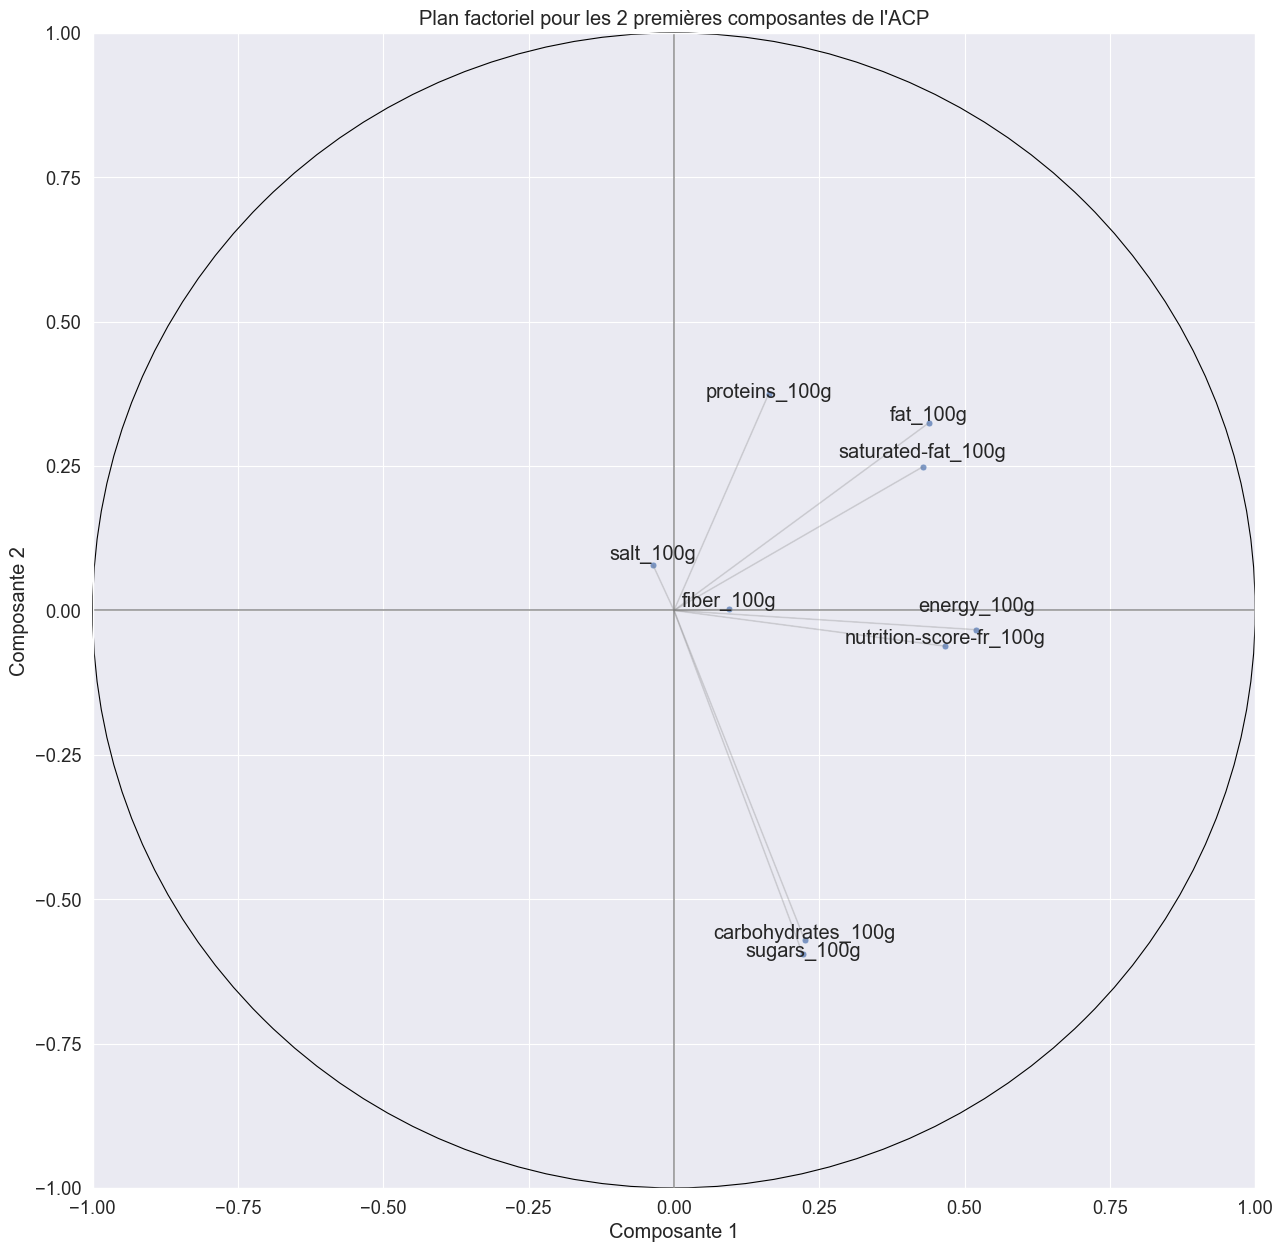

In [38]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 

In [ ]:
hitmap entre composante principale et variable,


Observations : 
* fat_100g et saturated-fat_100g expliquent bien la variance sur la composante 1 mais pas sur al composante 2
* fiber_100g n'explique la variable sur aucune des 2 composantes
* energy_100g n'explique pas la variable sur la composante 2 et quasiment pas sur la composante 1

* carbohydrates_100g et sugars_100g sont très proches et donc également corrélées positivement : 
* carbohydrates_100g, sugars_100g, sodium_100g et salt_100g expliquent bien al variance sur la composante 2, moins sur la composante 1.


In [ ]:
faire le lien entre les compoantes et les var

In [44]:
norms = np.linalg.norm(pca.components_[0:6], axis=0)
norms

array([0.68755941, 0.72943123, 0.74517697, 0.75649528, 0.75739291,
       0.97622978, 0.98167941, 0.9850966 , 0.63784007])

In [45]:
normes = pd.DataFrame(norms).T

In [46]:
normes.columns = colonnes_pca

In [47]:
normes = normes.T.reset_index()

In [48]:
normes.columns = ['feature', 'norme']
normes.sort_values(by='norme', inplace=True, ascending=False)

<Axes: title={'center': "Importance relative des features dans \n les 7 premières composantes de l'ACP"}, xlabel='norme', ylabel='feature'>

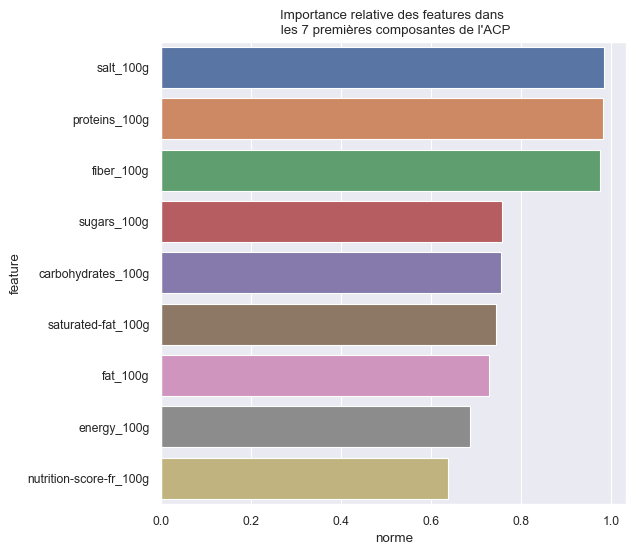

In [49]:
plt.figure(figsize=(6,6))
plt.title('Importance relative des features dans \n les 7 premières composantes de l\'ACP')
sns.barplot(y = normes['feature'],
            x = normes['norme'])

### clusters des groupe similaires

In [56]:
df_quant = df.select_dtypes(['float64','int32']).shape

#### Choix du nombre de clusters

In [59]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")
from tqdm import tqdm

def nombre_optimal_clusters(df, nb_k = 10):
    # Sélectionner uniquement les colonnes quantitatives
    df_quant =  df.select_dtypes(['float64','int32']).dropna()
    # Calcul de la somme des distances intra-clusters pour différentes valeurs de k
    SSE = []
    for cluster in tqdm(range(1, nb_k+1)):
        kmeans = KMeans(n_clusters=cluster, n_init=10, init='k-means++')
        kmeans.fit(df_quant)
        SSE.append(kmeans.inertia_)

     # Conversion des résultats en dataframe
    frame = pd.DataFrame({'Cluster': range(1, nb_k+1), 'SSE': SSE})

    # Calcul de la première et de la seconde dérivée de la SSE
    diff = np.diff(frame['SSE'])
    diff_diff = np.diff(diff)

    # Trouver le point "coude"
    elbow_index = np.argmax(diff_diff) + 2 +1

    # Tracer les résultats
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(frame['Cluster'], frame['SSE'], marker='o', label='Inertie')
    ax1.axvline(elbow_index, color='red', linestyle='--', label="Point 'coude'")
    ax1.plot(range(2, nb_k), diff_diff, marker='x', color='green', linestyle=':', label='Dérivée Seconde')
    ax1.set_xlabel('Nombre de clusters')
    ax1.set_ylabel('Inertie / Dérivée Seconde')
    ax1.set_xticks(np.arange(1, nb_k+1, step=1))
    ax1.legend(loc='best')

    fig.tight_layout()
    fig.suptitle("Analyse de l'inertie pour différentes valeurs de k", fontsize=16, y=1.05)
    plt.show()


    # Afficher le nombre optimal de clusters
    print("Le nombre optimal de clusters est: ", elbow_index)
    
    return elbow_index

100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


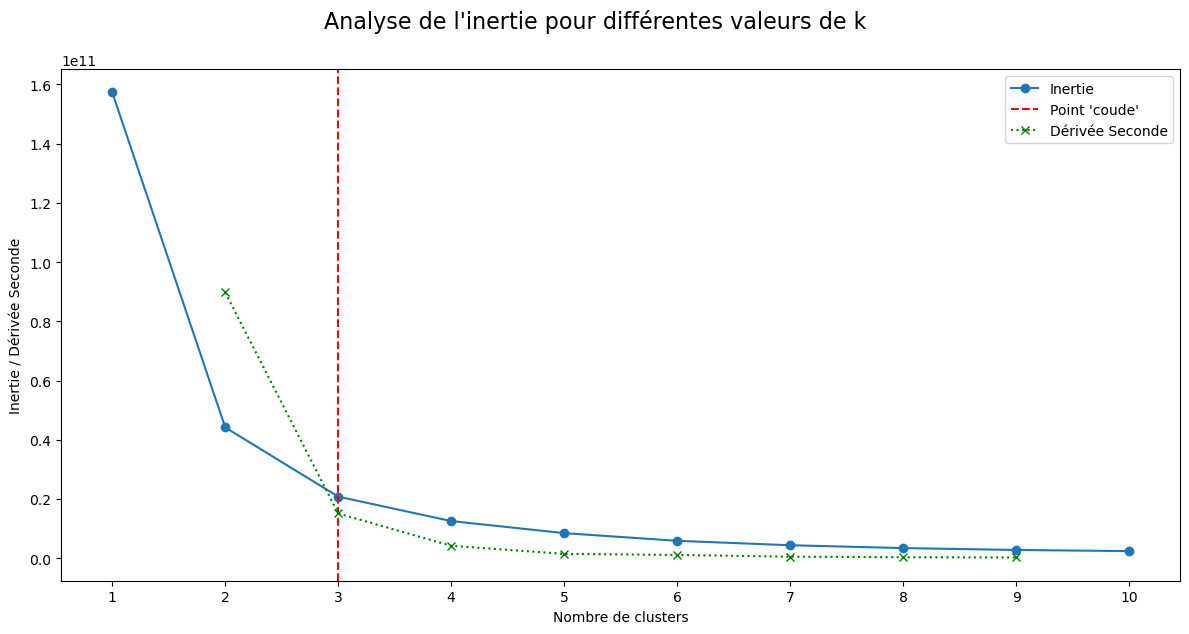

Le nombre optimal de clusters est:  3


In [60]:

result = nombre_optimal_clusters(df)

### Clustering

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def clustering_kmeans(df, nb_k):
    # Séparation des colonnes numériques et catégorielles
    category = df.select_dtypes(include='object')
    numerics = df.select_dtypes(['float64','int32']).dropna()
    # Normalisation des colonnes quantitatives
    scaler = StandardScaler()
    numerics_normalize = scaler.fit_transform(numerics)

    # Clustering k-means
    kmeans = KMeans(n_clusters=nb_k, n_init = 10)
    clusters = kmeans.fit_predict(numerics_normalize)

    # Ajout des clusters au DataFrame d'origine
    df_cluster = df.copy()
    df_cluster['cluster'] = clusters

    # Réorganisation des colonnes pour placer 'cluster' en première position
    colonne_cluster = df_cluster.pop('cluster')
    df_cluster.insert(0, 'cluster', colonne_cluster)

    return df_cluster

In [62]:
re = clustering_kmeans(df,3)
re.shape

(263548, 39)

In [21]:
re.columns

Index(['cluster', 'code', 'url', 'creator', 'created_datetime',
       'last_modified_datetime', 'product_name', 'quantity', 'packaging',
       'brands', 'categories_fr', 'origins', 'manufacturing_places',
       'labels_fr', 'emb_codes', 'first_packaging_code_geo', 'cities_tags',
       'purchase_places', 'stores', 'countries_fr', 'ingredients_text',
       'allergens', 'traces_fr', 'serving_size', 'additives_fr',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'image_url', 'image_small_url', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


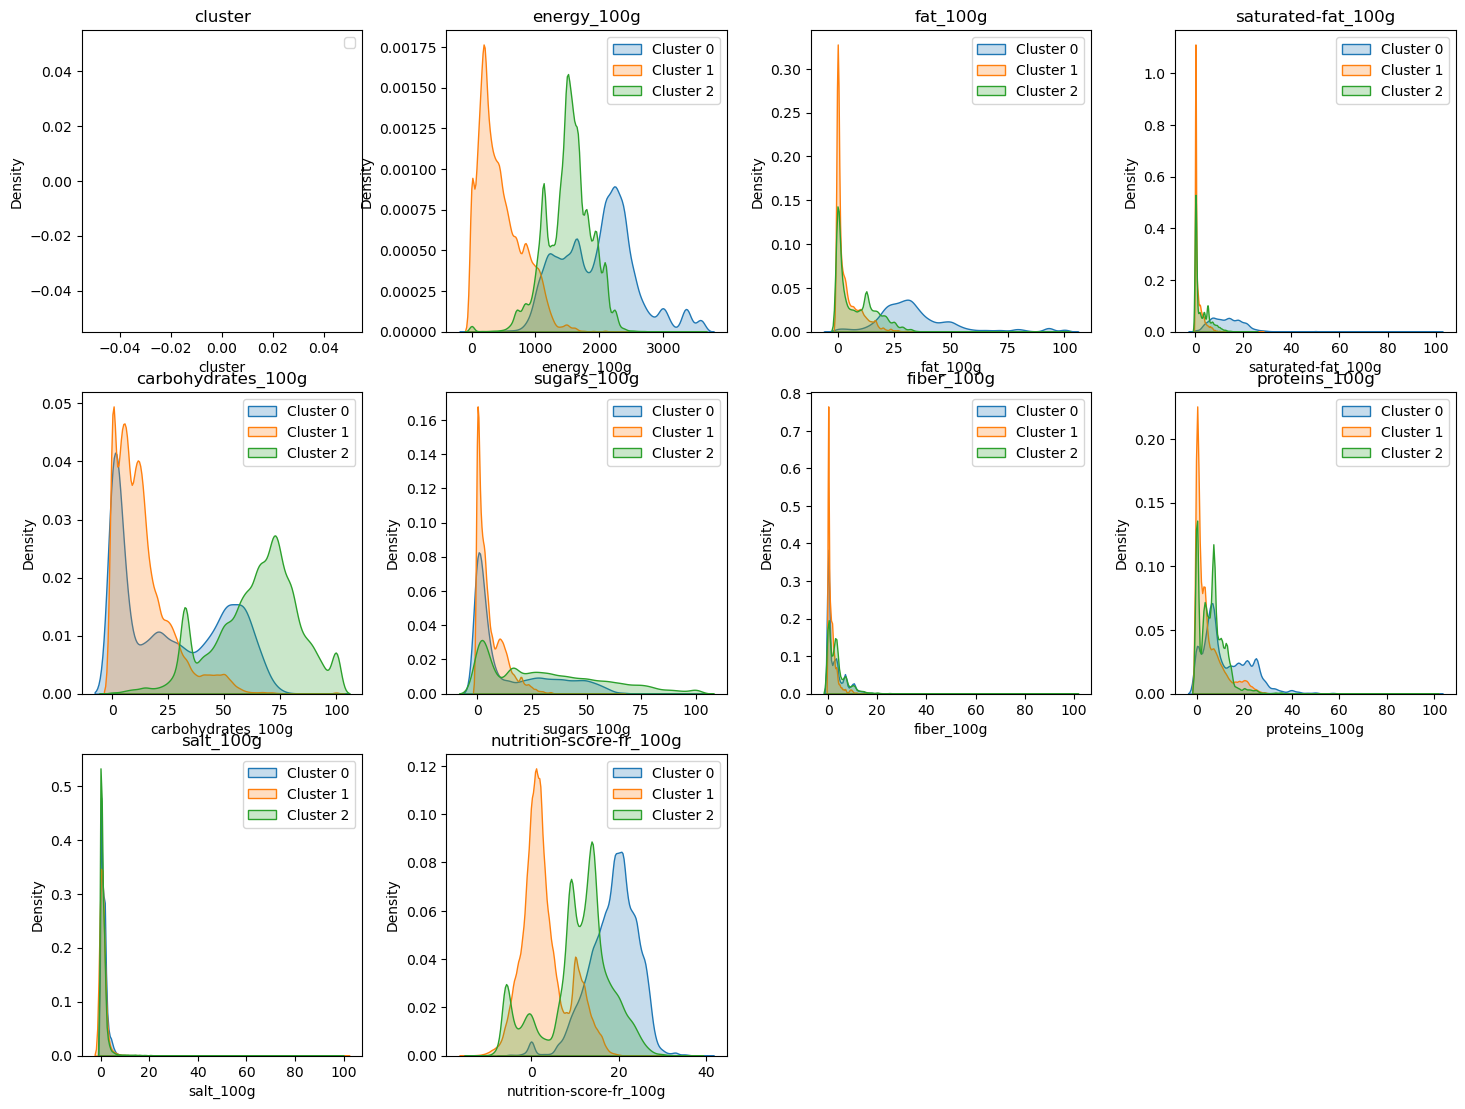

In [63]:
import seaborn as sns
import math
#  max de clusters
max_cluster = re["cluster"].max()
float_columns = re.select_dtypes(['float64','int32']).columns
nrows = int(math.ceil(len(float_columns) ** 0.5))
ncols = nrows
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))
fig.tight_layout(pad=3.0)
fig.subplots_adjust(hspace=0.2, wspace=0.3)
for idx, column in enumerate(float_columns):
    row = idx // ncols
    col = idx % ncols
      
    for i in range(max_cluster + 1):
        
        cluster = re[re["cluster"] == i][column]
        sns.kdeplot(cluster, fill=True, label="Cluster " + str(i), ax=axes[row, col])
        
    axes[row, col].set_title(column)
    
    axes[row, col].legend()

for idx in range(len(float_columns), nrows * ncols):
    row = idx // ncols
    col = idx % ncols
    axes[row, col].set_visible(False)

plt.show()


**Interpretation**
* energy (suger, energy)
(faible = cluster1
moyenne = cluster 0
forte = cluster2)
* fat (fiber, fat) (graisse)
*(faible = cluster1
moyenne = cluster 0
forte = cluster2)
* satureted_fact 
(faible = cluster1
moyenne = cluster 0
forte = cluster2)


In [95]:
data = {
    'energy': {'Faible': 1, 'Moyenne': 0, 'Forte': 2},
    'nutrition-score': {'Faible': 1, 'Moyenne': 0, 'Forte': 2},
    'fat': {'Faible': 1, 'Moyenne': 0, 'Forte': 2},
    'proteins': {'Faible': 0, 'Moyenne': 1, 'Forte': 2}
}

df = pd.DataFrame(data)
df = df.transpose()
df.index.name = 'Variables'
df.columns.name = 'Clusters'

print(df)


Clusters         Faible  Moyenne  Forte
Variables                              
energy           1       0        2    
nutrition-score  1       0        2    
fat              1       0        2    
proteins         0       1        2    


In [64]:
def filters(df):
    rows, columns = df.shape
    print("Nombre de lignes: ", rows)
    print("Nombre de colonnes: ", columns)

    filled_rows = df.dropna(how='all')  
    most_filled_row_index = filled_rows.notna().sum(axis=1).idxmax()  
    most_filled_row = filled_rows.loc[most_filled_row_index]  

    nan_columns = most_filled_row[most_filled_row.isna()].index
    other_rows = filled_rows.drop(most_filled_row_index)

    final_rows = [most_filled_row]

    for col in nan_columns:
        non_null_row = other_rows[other_rows[col].notna()].head(1)
        if not non_null_row.empty:
            final_rows.append(non_null_row.iloc[0])
            other_rows = other_rows.drop(non_null_row.index)

    final_df = pd.DataFrame(final_rows).reset_index(drop=True)

    if len(final_df) < 3:
        remaining_rows_needed = 3 - len(final_df)
        
        # Supprimer les lignes déjà présentes dans final_df en utilisant l'index d'origine
        original_indices = [row.name for row in final_rows]
        df_remaining = df.drop(original_indices, errors='ignore')
        
        sorted_remaining_rows = df_remaining.notna().sum(axis=1).sort_values(ascending=False)
        top_remaining_rows = sorted_remaining_rows.head(remaining_rows_needed).index
        additional_rows = df_remaining.loc[top_remaining_rows]
        final_df = pd.concat([final_df, additional_rows]).reset_index(drop=True)

    return final_df

In [65]:
dt = filters(df)

Nombre de lignes:  263548
Nombre de colonnes:  38


In [70]:
def filters2(df, criteres, niveau):
    cluster_mapping = {
        "Apport énergétique": {"Faible": 1, "Moyenne": 0, "Forte": 2},
        "Nutriscore": {"Faible": 1, "Moyenne": 0, "Forte": 2},
        "Taux de gras": {"Faible": 1, "Moyenne": 0, "Forte": 2},
        "Taux de glucide": {"Faible": 0, "Moyenne": 1, "Forte": 2}
    }

    def afficher_correspondance(cluster_mapping, cluster, criteres):
        for crit, niveaux in cluster_mapping.items():
            if crit != criteres:
                for niv, clust in niveaux.items():
                    if clust == cluster:
                        print(f"{crit} : {niv}")

    if criteres in cluster_mapping and niveau in cluster_mapping[criteres]:
        cluster = cluster_mapping[criteres][niveau]
        afficher_correspondance(cluster_mapping, cluster, criteres)
        df_filtré = df[df['cluster'] == cluster]
        return df_filtré
    else:
        print("Critère ou niveau invalide")
        return None


In [81]:
result = filters2(re, "Apport énergétique", "Forte")
#filters(df)

Nutriscore : Forte
Taux de gras : Forte
Taux de glucide : Forte


### recherche de correpondences entre produits similaires

In [77]:


def produits_similaires(df, code):
    # Trouver la ligne correspondante au code donné
    produit = df[df['code'] == code]
    
    # Vérifier si le code existe dans le dataframe
    if len(produit) == 0:
        print("Le code produit n'a pas été trouvé.")
        return
    
    # Récupérer la valeur du cluster pour ce produit
    cluster = produit.iloc[0]['cluster']
    
    # Récupérer la valeur du 'nutrition_grade_fr' pour ce produit
    nutrition_grade = produit.iloc[0]['nutrition_grade_fr']

    # Créer un dictionnaire avec les caractéristiques et leurs valeurs de cluster correspondantes
    caracteristiques = {
        "Apport énergétique": {1: "Faible", 0: "Moyenne", 2: "Forte"},
        "Nutriscore": {1: "Faible", 0: "Moyenne", 2: "Forte"},
        "Taux de gras": {1: "Faible", 0: "Moyenne", 2: "Forte"},
        "Taux de glucide": {0: "Faible", 1: "Moyenne", 2: "Forte"}
    }
  
    # Afficher les informations en fonction du cluster
    for caract, valeurs in caracteristiques.items():
        print(f"{caract} : {valeurs[cluster]}")
    
    # Sélectionner les lignes ayant le même cluster et le même 'nutrition_grade_fr'
    produits_similaires = df[(df['cluster'] == cluster) & (df['nutrition_grade_fr'] == nutrition_grade)]
    
    # Extraire les termes de categories_fr du produit recherché
    if isinstance(produit.iloc[0]['categories_fr'], str):
        categories_fr = set(produit.iloc[0]['categories_fr'].split(','))

    # Filtrer les produits similaires qui contiennent au moins un des termes de packaging
    produits_similaires = produits_similaires[produits_similaires['categories_fr'].apply(lambda x: any(term in str(x).split(',') for term in categories_fr))]
    
    # Ajouter une nouvelle colonne qui compte le nombre de catégories communes
    produits_similaires['categories_common_count'] = produits_similaires['categories_fr'].apply(lambda x: len(categories_fr.intersection(set(str(x).split(',')))))
    
    # Trier le dataframe selon le nombre de catégories communes
    produits_similaires = produits_similaires.sort_values('categories_common_count', ascending=False)
    
    produit_code = df[df['code'] == code]
    display(produit_code)
    
    return produits_similaires


In [80]:
result = produits_similaires(re, code = 3250390768296)
#result

Apport énergétique : Forte
Nutriscore : Forte
Taux de gras : Forte
Taux de glucide : Forte


,cluster,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,brands,categories_fr,origins,manufacturing_places,labels_fr,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_fr,ingredients_text,allergens,traces_fr,serving_size,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
188090,2,3250390768296,http://world-fr.openfoodfacts.org/produit/3250390768296/12-briochettes-chabrior,sebleouf,2014-01-23T18:35:09Z,2016-01-01T16:03:53Z,12 Briochettes,480 g,Sachet plastique,"Chabrior,Sélection Intermarché,Les Mousquetaires","Petit-déjeuners,Snacks sucrés,Viennoiseries,Brioches","Farine de blé,Union Européenne","Le Fournil du Val de Loire - FVL [Filiale ITM Entreprises (Groupement Les Mousquetaires)] - Rue d'Auvergne - 37300 Joué-lès-Tours,Indre-et-Loire,Centre-Val de Loire,France","Labels de distributeurs,Sélection Intermarché",EMB 37122F,"47.35,0.666667",joue-les-tours-indre-et-loire-france,"Amplepuis,France",Intermarché,France,"Farine de _blé_ (UE) 53 %, eau, sucre _œufs_ frais, beurre concentré (dont _lait_), huile de colza, sirop de glucose-fructose, levure, sel, émulsifiants (mono- et diglycérides d'acides gras et stéaroyl-2-lactylate de sodium), arôme, colorant (bêta-carotène), épaississant (carboxyméthylcellulose), conservateur (propionate de calcium), antioxydant (acide ascorbique).","blé, œufs, lait",Soja,40 g (1 briochette),"E471 - Mono- et diglycérides d'acides gras alimentaires,E160a - Bêta-carotène,E466 - Carboxyméthylcellulose,E282 - Propionate de calcium,E300 - Acide ascorbique,E481 - Stéaroyl-2-lactylate de sodium",NaN,"e471-mono-et-diglycerides-d-acides-gras-alimentaires,e160a-beta-carotene,e481-stearoyl-2-lactylate-de-sodium",d,http://fr.openfoodfacts.org/images/products/325/039/076/8296/front.9.400.jpg,http://fr.openfoodfacts.org/images/products/325/039/076/8296/front.9.200.jpg,1411.0,11.4,4.7,48.2,11.4,2.26,8.6,1.0,14.0


### Test d'indépendance: analyse de Variance (ANOVA)

 * Pour comparer les moyennes de variables numériques en fonction des catégories d'une variable catégorielle. Cela aide à déterminer si les moyennes des groupes catégoriels sont significativement différentes.

In [85]:

from scipy.stats import f_oneway

def anova_test(df, numeric_column, categorical_column):
    # Sélection des colonnes pertinentes
    selected_columns = [numeric_column, categorical_column]

    # Création d'un sous-dataframe avec les colonnes sélectionnées
    sub_df = df[selected_columns].dropna()

    # Effectuer le test ANOVA
    groups = [sub_df[sub_df[categorical_column] == category][numeric_column] 
              for category in sub_df[categorical_column].unique()]
    anova_result = f_oneway(*groups)

    # Affichage du résultat du test
    print("Résultat du test ANOVA :")
    print(anova_result)

    # Interprétation du résultat
    alpha = 0.05
    p_value = anova_result.pvalue
    if p_value < alpha:
        print(f"La p-valeur ({p_value:.4f}) est inférieure à alpha ({alpha}): Rejet de l'hypothèse nulle.")
        print(" les moyennes sont différentes.")
    else:
        print(f"La p-valeur ({p_value:.4f}) est supérieure à alpha ({alpha}): Acceptation de l'hypothèse nulle.")
        print(" moyennes ne sont différentes.")



In [92]:

anova_test(re, 'saturated-fat_100g', 'allergens')


Résultat du test ANOVA :
F_onewayResult(statistic=2.007334311078916, pvalue=0.0)
La p-valeur (0.0000) est inférieure à alpha (0.05): Rejet de l'hypothèse nulle.
 les moyennes sont différentes.


In [ ]:

 Linear correlation
 Correlation tests
 Correlation with Predictive Power Score (decision tree based)
 Contingency table and Chi-squared
 ANOVA
 Non-parametric statistical hypothesis tests
 Pair plots